In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import matplotlib.pyplot as plt

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

%matplotlib widget

In [2]:
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from LinearMPC_template.MPCVelControl import MPCVelControl

rocket_obj_path     = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path  = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 1/20
H  = 20.0
Tf = 20.0

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

xs, us = mpc.xs, mpc.us


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [4]:
OPEN_STYLE  = dict(linestyle="--", linewidth=2.5, alpha=0.85, marker="o", markersize=3, markevery=10)
CLOSED_STYLE = dict(linestyle="-", linewidth=1.8, alpha=0.95)

def _apply_grid_legend(ax):
    ax.grid(True)
    ax.legend()

In [5]:
def run_axis_tracking_test(axis: str, x_target: np.ndarray, sim_method="linear", animate=False):
    x0 = xs.copy()
    t0 = 0.0

    # OPEN LOOP (tracking)
    u0_ol, x_ol, u_ol, t_ol = mpc.get_u(t0, x0, x_target=x_target)

    # CLOSED LOOP (tracking)
    t_cl, x_cl, u_cl, t_ol_hist, x_ol_hist, u_ol_hist, _ = rocket.simulate_control(
        mpc, Tf, H, x0, x_target=x_target, method=sim_method
    )

    T_h = t_ol[-1]
    idx = np.where(t_cl <= T_h + 1e-12)[0]
    t_cl_h = t_cl[idx]
    t_cl_u = t_cl_h[:-1]

    fig, axs = plt.subplots(3, 1, figsize=(9, 8), sharex=False)
    axs[0].set_title(f"{axis.upper()} tracking (open vs closed)")

    if axis == "x":
        y_ref = x_target[6]
        y_ol = x_ol[6, :]
        y_cl = x_cl[6, idx]
        u_ol_i = u_ol[1, :]
        u_cl_i = u_cl[1, :len(t_cl_u)]

        axs[0].plot(t_ol, y_ol, label="vx (open)", **OPEN_STYLE)
        axs[0].plot(t_cl_h, y_cl, label="vx (closed)", **CLOSED_STYLE)
        axs[0].axhline(y_ref, color="k", linestyle=":")
        axs[0].set_ylabel("vx [m/s]")

        axs[1].plot(t_ol[:-1], u_ol_i, label="δ2 (open)", **OPEN_STYLE)
        axs[1].plot(t_cl_u, u_cl_i, label="δ2 (closed)", **CLOSED_STYLE)
        axs[1].set_ylabel("δ2 [rad]")

    elif axis == "y":
        y_ref = x_target[7]
        y_ol = x_ol[7, :]
        y_cl = x_cl[7, idx]
        u_ol_i = u_ol[0, :]
        u_cl_i = u_cl[0, :len(t_cl_u)]

        axs[0].plot(t_ol, y_ol, label="vy (open)", **OPEN_STYLE)
        axs[0].plot(t_cl_h, y_cl, label="vy (closed)", **CLOSED_STYLE)
        axs[0].axhline(y_ref, color="k", linestyle=":")
        axs[0].set_ylabel("vy [m/s]")

        axs[1].plot(t_ol[:-1], u_ol_i, label="δ1 (open)", **OPEN_STYLE)
        axs[1].plot(t_cl_u, u_cl_i, label="δ1 (closed)", **CLOSED_STYLE)
        axs[1].set_ylabel("δ1 [rad]")

    elif axis == "z":
        y_ref = x_target[8]
        y_ol = x_ol[8, :]
        y_cl = x_cl[8, idx]
        u_ol_i = u_ol[2, :]
        u_cl_i = u_cl[2, :len(t_cl_u)]

        axs[0].plot(t_ol, y_ol, label="vz (open)", **OPEN_STYLE)
        axs[0].plot(t_cl_h, y_cl, label="vz (closed)", **CLOSED_STYLE)
        axs[0].axhline(y_ref, color="k", linestyle=":")
        axs[0].set_ylabel("vz [m/s]")

        axs[1].plot(t_ol[:-1], u_ol_i, label="Pavg (open)", **OPEN_STYLE)
        axs[1].plot(t_cl_u, u_cl_i, label="Pavg (closed)", **CLOSED_STYLE)
        axs[1].set_ylabel("Pavg [%]")

    elif axis == "roll":
        y_ref = x_target[5]
        y_ol = x_ol[5, :]
        y_cl = x_cl[5, idx]
        u_ol_i = u_ol[3, :]
        u_cl_i = u_cl[3, :len(t_cl_u)]

        axs[0].plot(t_ol, y_ol, label="γ (open)", **OPEN_STYLE)
        axs[0].plot(t_cl_h, y_cl, label="γ (closed)", **CLOSED_STYLE)
        axs[0].axhline(y_ref, color="k", linestyle=":")
        axs[0].set_ylabel("γ [rad]")

        axs[1].plot(t_ol[:-1], u_ol_i, label="Pdiff (open)", **OPEN_STYLE)
        axs[1].plot(t_cl_u, u_cl_i, label="Pdiff (closed)", **CLOSED_STYLE)
        axs[1].set_ylabel("Pdiff [%]")

    axs[2].plot(t_cl_h, y_cl - y_ref, label="tracking error")
    axs[2].set_ylabel("error")

    axs[2].set_xlabel("t [s]")
    for ax in axs:
        ax.grid(True)
        ax.legend()
    fig.tight_layout()

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

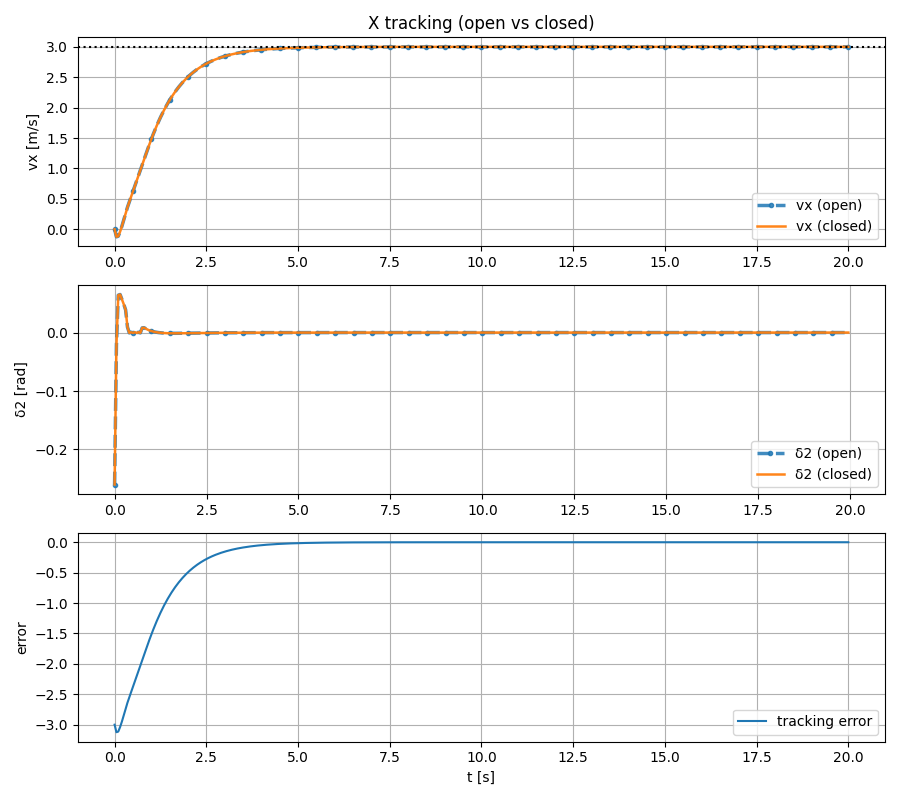

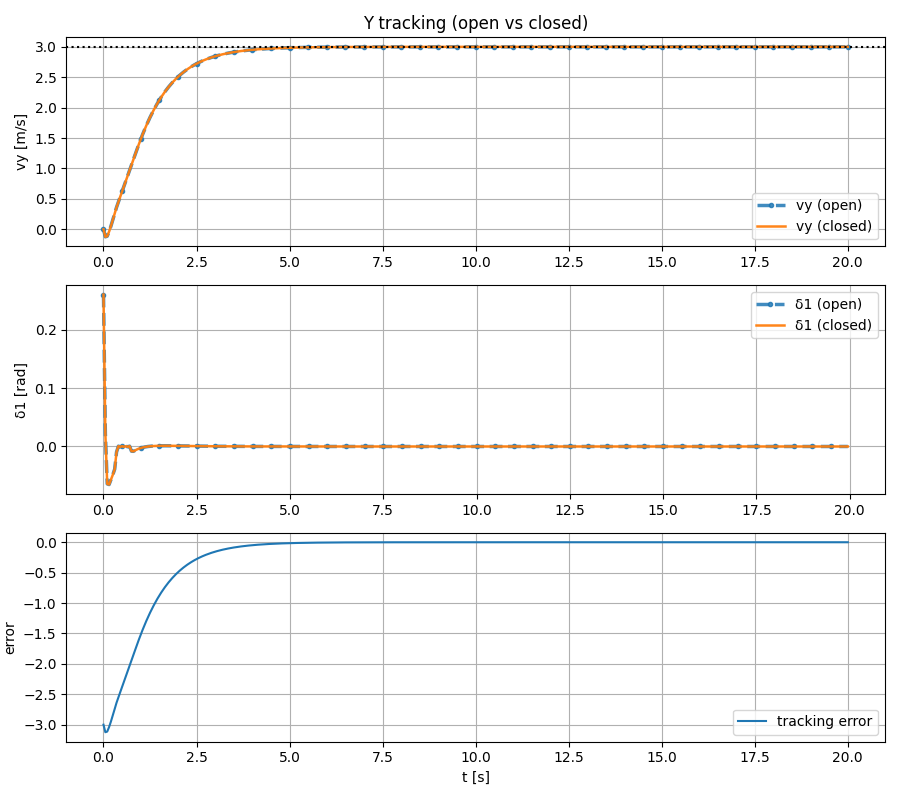

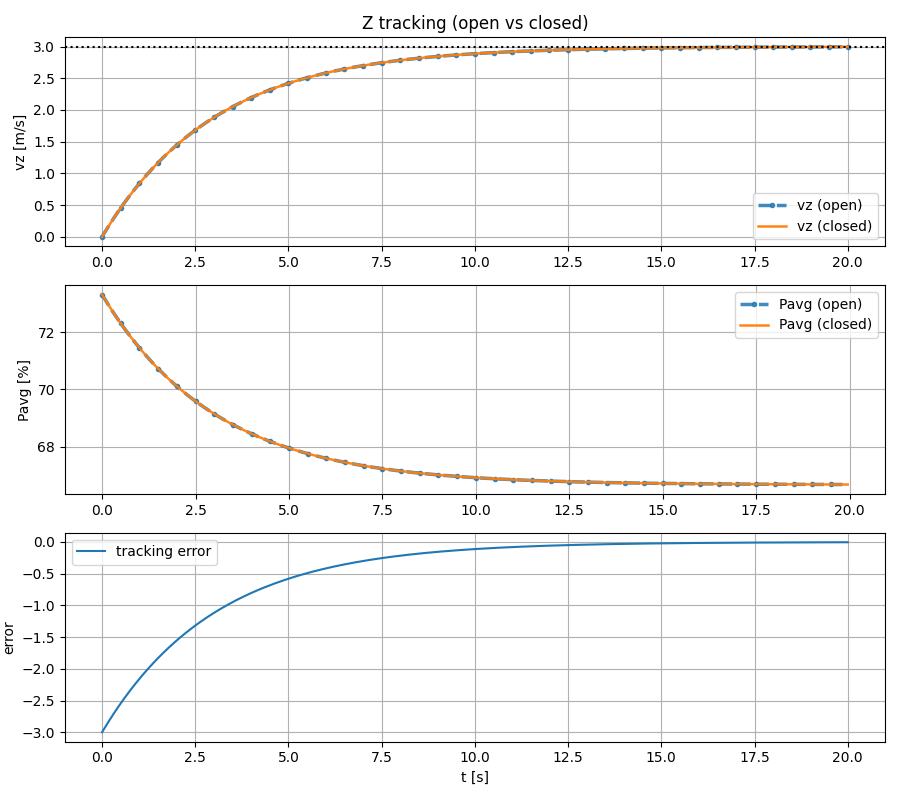

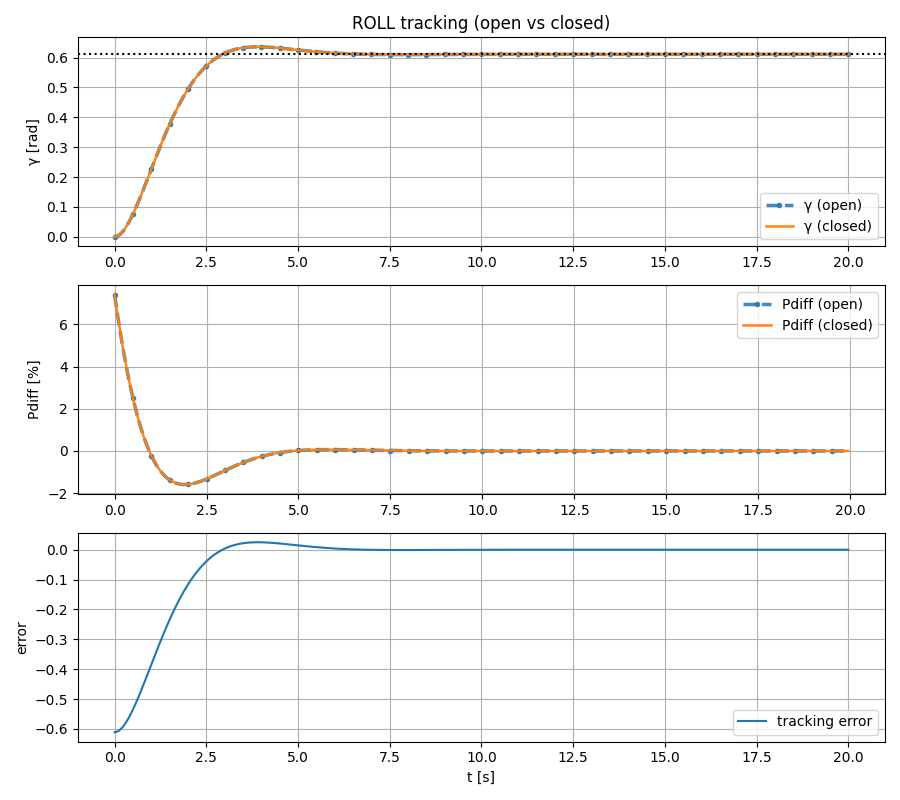

In [6]:
# X velocity tracking (3 m/s)
x_target = xs.copy()
x_target[6] = 3.0
run_axis_tracking_test("x", x_target)

# Y velocity tracking (3 m/s)
x_target = xs.copy()
x_target[7] = 3.0
run_axis_tracking_test("y", x_target)

# Z velocity tracking (3 m/s)
x_target = xs.copy()
x_target[8] = 3.0
run_axis_tracking_test("z", x_target)

# Roll tracking (35 deg)
x_target = xs.copy()
x_target[5] = np.deg2rad(35.0)
run_axis_tracking_test("roll", x_target)